In [1]:
import numpy as np
import matplotlib.pyplot as ppt
import caffe
import adex.core
import adex.googlenet

%matplotlib inline

# Define constants
CAFFE_ROOT = '/home/chrisbot/Projects/caffe'
DATA_ROOT = '/media/sf_Masterarbeit/data/ILSVRC2012_img_train'
STEPS = 20
t_values = np.linspace(0, 1, num=STEPS)

# Load net, labels and transformer
net = adex.googlenet.load_model(CAFFE_ROOT, 1)
labels = adex.googlenet.load_labels(CAFFE_ROOT)
transformer = adex.googlenet.build_transformer(net)

image_1_class = 'n02127052'
image_1_label = adex.googlenet.get_label_from_class_name(labels, image_1_class)
image_1_fname = DATA_ROOT + '/' + image_1_class + '/' + 'n02127052_408.JPEG'

image_2_class = 'n04099969'
image_2_label = adex.googlenet.get_label_from_class_name(labels, image_2_class)
image_2_fname = DATA_ROOT + '/' + image_2_class + '/' + 'n04099969_21489.JPEG'

# Load images
image_1 = adex.googlenet.load_image(transformer, image_1_fname)
image_2 = adex.googlenet.load_image(transformer, image_2_fname)

In [2]:
first_ae, first_t = None, None
progress = np.empty((STEPS, 2))

all_images = []

for index, t in enumerate(t_values):
    print('t={0:.4f}'.format(t))
    image_ae = (1-t) * image_1 + t * image_2
    image_ae = np.expand_dims(image_ae, 0)
    preds, probs = adex.core.predict(net, image_ae)
    progress[index, 0] = probs[0, image_1_label]
    progress[index, 1] = probs[0, image_2_label]
    
    all_images.append(image_ae)
    
    # Catch the first image that fools the network (in the sense that it has relative majority)
    if first_ae is None and np.argmax(probs[0]) == image_2_label:
    #if first_ae is None and probs[0, image_2_label] >= probs[0, image_1_label]:
        print('AE found for t={0}'.format(t))
        first_ae = image_ae
        fist_t = t

t=0.0000
t=0.0526
t=0.1053
t=0.1579
t=0.2105
t=0.2632
t=0.3158
t=0.3684
t=0.4211
t=0.4737
t=0.5263
t=0.5789
t=0.6316
AE found for t=0.631578947368
t=0.6842
t=0.7368
t=0.7895
t=0.8421
t=0.8947
t=0.9474
t=1.0000


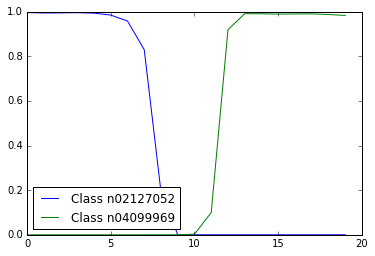

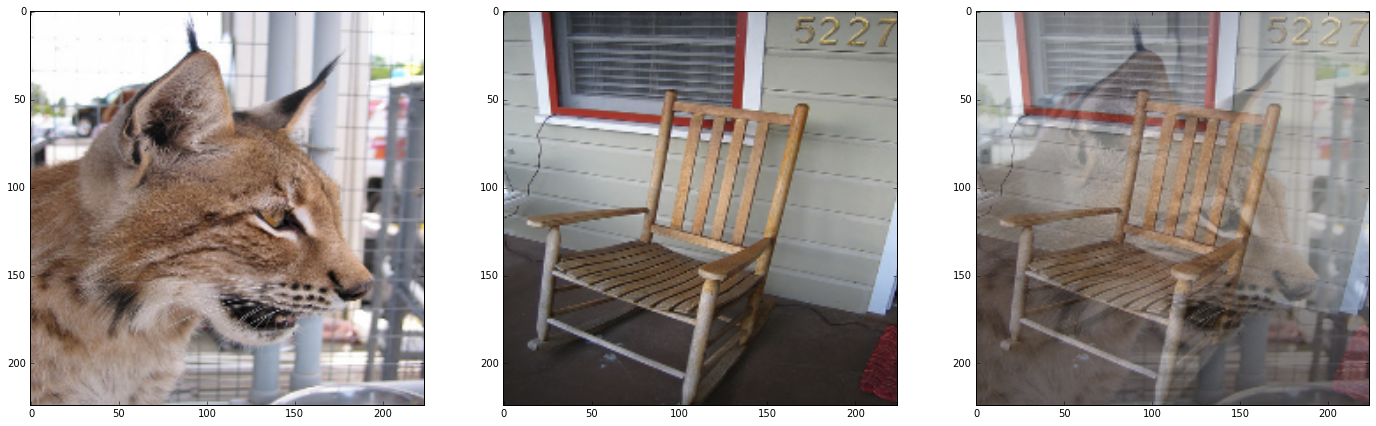

In [3]:
ppt.plot(progress[:,0], label='Class {0}'.format(image_1_class))
ppt.plot(progress[:,1], label='Class {0}'.format(image_2_class))
ppt.legend(loc='lower left')

ppt.figure(figsize=(24, 8))
ax = ppt.subplot(1, 3, 1)
image_1_deproc = transformer.deprocess('data', image_1)
ppt.imshow(image_1_deproc, label='Class {0}'.format(image_1_class))

ax = ppt.subplot(1, 3, 2)
image_2_deproc = transformer.deprocess('data', image_2)
ppt.imshow(image_2_deproc, label='Class {0}'.format(image_2_class))

if first_ae is not None:
    ax = ppt.subplot(1, 3, 3)
    first_ae_deproc = transformer.deprocess('data', first_ae)
    ppt.imshow(first_ae_deproc, label='Superposition t={0}'.format(first_t))
else:
    print('Failed to construct an AE.')

#ax.legend(loc='lower left')

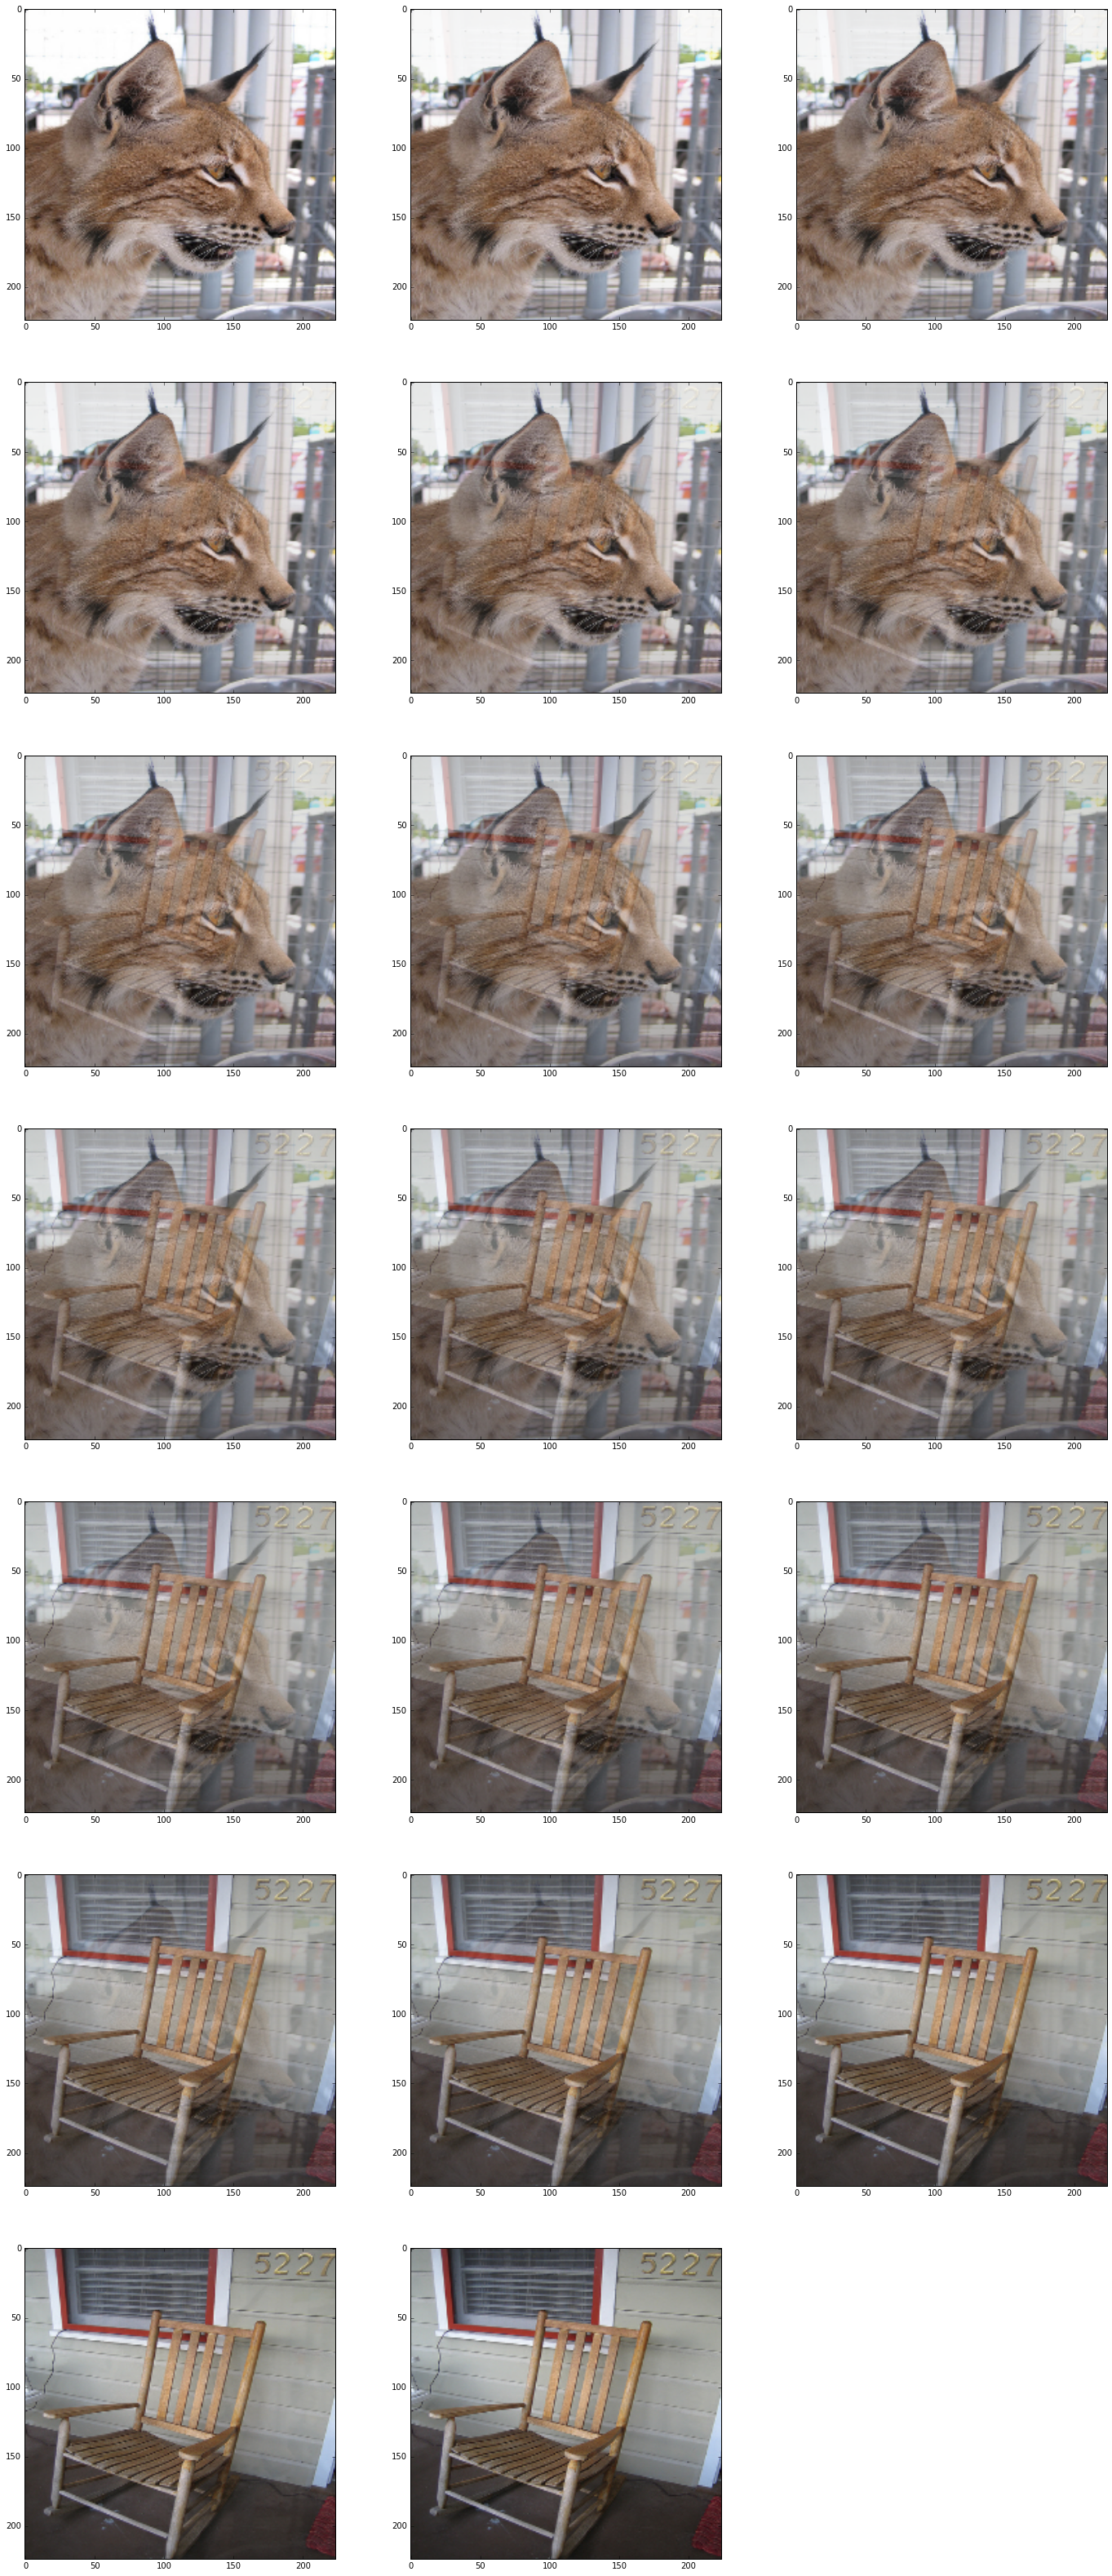

In [8]:
import math

rows = int(math.ceil(len(all_images) / 3.0))

ppt.figure(figsize=(8*3, 8*rows))
for index in range(len(all_images)):
    ax = ppt.subplot(rows, 3, index + 1)
    image_deproc = transformer.deprocess('data', all_images[index])
    ppt.imshow(image_deproc)